Context
This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

Content
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

userid: A unique number that identifies each player.
version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.
retention_1: Did the player come back and play 1 day after installing?
retention_7: Did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either.

Dataset link:
https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats?select=cookie_cats.csv

Контекст
Этот датасет включает результаты A/B-теста приложения Cookie Cats, чтобы проверить, что происходит, когда первые врата в игре перенесены с уровня 30 на уровень 40. Когда игрок устанавливает игру, он/она рандомно 

Содержимое
Собрана информация о 90,189 игроках, ккоторые установили игру в период проведения A/B-теста.
Переменные:
userid - уникальный номер, который идентефицирует каждого игрока
version - одна из двух версий игры ( A или B), в которую были помещены игроки в ходе A/B тестирования. gate_30 - контрольная группа, gate_40 - тестовая группа.
sum_gamerounds - количество раундов, которые сыграны игроко в течение первых 14 дней после установки
retention_1 - метрика ретеншн первого дня, вернулся ли игрок спустя 1 день после установки
retention_7 - метрика ретеншн первого дня, вернулся ли игрок спустя 7 дней после установки

Ссылка на датасет:
https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats?select=cookie_cats.csv

In [5]:
#Импортируем необходимые библиотеки / Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from tqdm import tqdm

In [6]:
url = 'https://drive.google.com/file/d/1LBjrAL3ICkAPlFpZBsPzf2p51zuB9HYu/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
table = pd.read_csv(url)

[Ru] - Посмотрим на таблицу, типы данных в таблице, дубликаты и пропущенные значения

__________________________________________________________________________________________

[En] - Let's look at the table, data types, duplicates in the table and missing values

In [7]:
table.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
table.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [9]:
table.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [10]:
table.isnull().mean()

userid            0.0
version           0.0
sum_gamerounds    0.0
retention_1       0.0
retention_7       0.0
dtype: float64

In [11]:
table.userid.duplicated().sum()

0

In [12]:
table.query('sum_gamerounds ==0').groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,1937,1937,1937,1937
gate_40,2057,2057,2057,2057



[En] We see that there are no duplicated and missing values in researching table. There are no crossing values between control and test groups, so the groups are independent
__________________________________________________________________________________________

[Ru] Видим, что пропущенных значений и дубликатов значений нет в исследуемом датасете. Также видим, что нет пересечений между контрольной и тестовой группами, следовательно, группы являются независимыми.


[En] Let's have a look on A/B-test groups
__________________________________________________________________________________________

[Ru] Посмотрим на группы A/B-теста.

In [13]:
table['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [14]:
table['version'].value_counts(normalize=True) #Процент количества значений в каждой из групп / Percentage of values in groups

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

In [15]:
grouped_table = table.groupby('version').agg({'userid':'count',
                                              'sum_gamerounds':'mean',
                                              'retention_1':'sum',
                                              'retention_7':'sum'
}).copy()
grouped_table

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,52.456264,20034,8502
gate_40,45489,51.298776,20119,8279


[EN] As a result, we get 2 independent groups (control and test) which are practically equal in the number of values 
__________________________________________________________________________________________

[RU] В результате проведенного тестирования получили 2 независимые, практически равные по количеству значений, группы (контрольную и тестовую)

[EN] There are 3 metrics of mobile app 1-day retention, 7-day retention and the sum of played gamerounds for 14 days after install in this dataset.
The retention is one of the important metrics for any mobile app, especially for mobile games.
So, retention is a key metric and the sum of played gamerounds for 14 days after install is a secondary metric of the research of the A/B-testing results 
__________________________________________________________________________________________

[RU] В данном датасете представлены 3 метрики мобильного приложения ретеншн (1го и 7го дня) и сумма сыгранных раундов за 14 дней после установки. 
Для любого мобильного приложения, особенно моб. игры, метрика ретеншна является одной из важнейших метрик.
Поэтому целевой метрикой исследования результатов А/Б теста является ретеншн, а второстепенной метрикой - сумма сыгранных раундов. 

В описании датасета не описан полностью дизайн проводимого A/B-теста.  Исходя из данных сформулируем гипотезу данного A/B-теста:

Н0: Не внедрять изменения в продукт, т.к. новая фича никак не влияет или отрицательно влияет на ключевую и второстепенную метрику продукта.

Н1: Внедрять изменения - масштабировать новую фичу для всех пользователей, т.к. новая фича положительно влияет на ключевую и второстепенную метрику продукта.

Возьмем стандартные значения для проверки гипотезы:

Вероятность совершить ошибку 1-го рода (False-positive) Alpha = 5% == 0.05

Вероятность совершить ошибку 2-го рода (False-negative) Beta = 20% == 0.20

[EN] The order of research 
1. Retention (1-day/7-day) - key metric
2. sum of played gamerounds for 14 days - secondary metric
__________________________________________________________________________________________
[RU] Порядок исследования результатов А/Б тестирования:
1. Ретеншн (1го/7го дня) - ключевая метрика исследов
2. Сумма сыгранных раундов - второстепенна метрика

Ретеншн 1-го и 7-го дня являются - категориальной независимой переменной. 
Сначала проверим исследуемые выборки на статистически значимые различия с помощью критерия Хи-квадрат.
Далее, проведем еще один тест - Бутстрэп и сравним полученные результаты.

In [16]:
grouped_table['retention_1_rate'] = grouped_table['retention_1']/grouped_table['userid']
grouped_table['retention_7_rate'] = grouped_table['retention_7']/grouped_table['userid']
grouped_table.rename(columns={'userid':'user_count',
                               'sum_gamerounds':'mean_gamerounds'}, 
                               inplace=True)
grouped_table = grouped_table.reindex(
    columns=['user_count', 'retention_1', 'retention_1_rate', 'retention_7','retention_7_rate', 'mean_gamerounds' ])

grouped_table

,user_count,retention_1,retention_1_rate,retention_7,retention_7_rate,mean_gamerounds
version,,,,,,
gate_30,44700,20034,0.448188,8502,0.190201,52.456264
gate_40,45489,20119,0.442283,8279,0.182000,51.298776


In [17]:
retention_rate_difference = grouped_table[['retention_1_rate','retention_7_rate']].diff().copy().reset_index(drop=True).dropna()
retention_rate_difference

,retention_1_rate,retention_7_rate
1,-0.005905,-0.008201


[EN] We see that the metrics of 1-day & 7-day retentions is reduced in test group over control group.
In that case we have to check why it happens: is it the effect of introduction of the new feature or just an accident?
 
__________________________________________________________________________________________

[RU] Видим, что метрика ретеншн 1го дня и ретеншн 7го дня в тестовой группе снизилась по сравнению с контрольной группой. 
Мы должны проверить является ли это изменение результатом внедрения фичи, а именно расположение ворот на разных уровнях, или это стечение обстоятельств. 

In [18]:
from statsmodels.stats.proportion import proportions_ztest #Загрузим необходимый тест \ import the necesserary test

[EN]
Retention 1-day/7-day hypothesis 

H0: There is no significant difference between groups (Gate30=Gate40). p-value > 0.05

H1: There is a significant difference between groups (Gate30<>Gate40). p-value <0 .05

Confident level 95%
__________________________________________________________________________________________

[RU]
Гипотезы для метрики Ретенш 1го/7го дня

Н0: Нет статистически значимой разницы между результатами групп (Gate30=Gate40). p-value > 0.05

Н1: Статистически значимая разница наблюдается. Gate30<>Gate40. p-value <0 .05

Уровень уверенности 95%

In [19]:
_, chi_pvalue_r1 = proportions_ztest([grouped_table[grouped_table.index =='gate_30']['retention_1'].values,
                                      grouped_table[grouped_table.index =='gate_40']['retention_1'].values],
                  [grouped_table[grouped_table.index =='gate_30']['user_count'].values,
                   grouped_table[grouped_table.index =='gate_40']['user_count'].values])

confident_level = 0.95
alpha = (1 - confident_level)

if chi_pvalue_r1 >= alpha:
    print('{0:0.5f} >= 0.05'.format(chi_pvalue_r1[0]), '\nThere is no significant difference','\nНет статистически значимой разницы')
else:
    print('{0:0.5f} < 0.05'.format(chi_pvalue_r1[0]), '\nThere is significant difference','\nCтатистически значимая разница есть')



0.07441 >= 0.05 
There is no significant difference 
Нет статистически значимой разницы


In [20]:
_, chi_pvalue_r7 = proportions_ztest([grouped_table[grouped_table.index =='gate_30']['retention_7'].values,
                                      grouped_table[grouped_table.index =='gate_40']['retention_7'].values],
                  [grouped_table[grouped_table.index =='gate_30']['user_count'].values,
                   grouped_table[grouped_table.index =='gate_40']['user_count'].values])


if chi_pvalue_r7 >= alpha:
    print('{0:0.5f} >= 0.05'.format(chi_pvalue_r7[0]), '\nThere is no significant difference', '\nНет статистически значимой разницы')
else:
    print('{0:0.5f} < 0.05'.format(chi_pvalue_r7[0]), '\nThere is a significant difference','\nCтатистически значимая разница есть')


0.00155 < 0.05 
There is a significant difference 
Cтатистически значимая разница есть


[EN] Chi-squared test results:
1. There is no significant difference in 1-day retention metric between A/B groups and we haven't the reasons to decline H0
2. There is a significant difference in 1-day retention metric between A/B groups and we have the reasons to decline H0 and accept H1
__________________________________________________________________________________________

[RU] Критерий Хи-Квадрат показал следующие результаты:
1. Изменения в метрике ретеншн 1го дня не являются статистическим значимыми и у нас нет оснований отклонить H0
2. Изменения в метрике ретеншн 7го дня являются статистическим значимыми и у нас есть основания отклонить Н0 и принять Н1



[EN] The next step is a bootstrap of our metrics and the comparison of the results with the results of the previous tests.
__________________________________________________________________________________________

[RU] Далее проведем бутстреп интересующих нас метрик и сравним с результатом ранее проведенных тестов

In [21]:
boot_data_1day_retention = [] # Словари для хранения результатов итераций бутстрепа / list for collecting bootstrap results
boot_data_7day_retention = [] 


population_size = max([len(table[table['version']=='gate_30']), len(table[table['version']=='gate_40'])]) 
#одинаковый размер A B групп для бутстрэпа, чтобы сохранить дисперсию / equal size A B groups for bootstraping 

for i in tqdm(range(10000)): #number of iterations

    sample_a = table[table['version']=='gate_30'][['retention_1','retention_7']]\
        .sample(population_size, replace=True).reset_index() # Sample control group
    
    sample_b = table[table['version']=='gate_40'][['retention_1','retention_7']]\
        .sample(population_size, replace=True).reset_index() # Sample test group
    

    boot_data_1day_retention.append(sample_a['retention_1'].mean()-sample_b['retention_1'].mean())
    boot_data_7day_retention.append(sample_a['retention_7'].mean()-sample_b['retention_7'].mean())


pd_boot_data_1dr = pd.DataFrame(boot_data_1day_retention)
pd_boot_data_7dr = pd.DataFrame(boot_data_7day_retention)



  0%|          | 44/10000 [00:01<05:43, 29.00it/s]

100%|██████████| 10000/10000 [04:03<00:00, 41.02it/s]


In [22]:

def normal_ci(bootstrap_data, pe, cl): #функция определения границ нормального ДИ / ci limit-define function 
    z = stats.norm.ppf(1 - cl/ 2)
    se = np.std(bootstrap_data)
    left_norm_ci, right_norm_ci = pe - z * se, pe + z * se
    return left_norm_ci, right_norm_ci

[EN] H0: There is no significant difference between the compared groups (0 belongs to CI). 
H1:  There is a significant difference between the compared groups (0 belongs to CI).
__________________________________________________________________________________________
[RU] Н0: Различия между сравниваемыми группа не статистически значимые (0 в пределах ДИ)
Н1: Различия между сравниваемыми группа статистически значимые

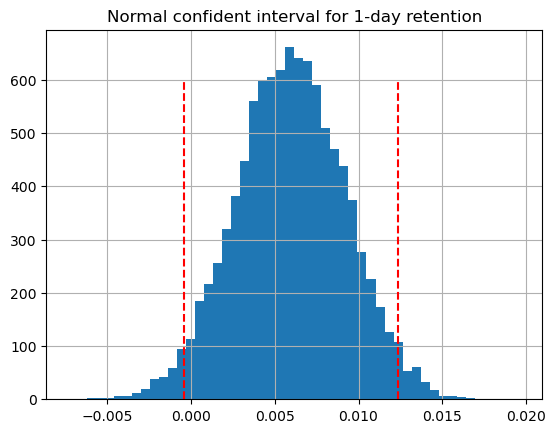

In [23]:
plt.rcParams.update(plt.rcParamsDefault)
pd_boot_data_1dr.hist(bins=50)

plt.vlines([normal_ci(pd_boot_data_1dr, pd_boot_data_1dr.mean(), 0.05)], ymax=600 ,ymin=0, linestyles='--', colors='red') #Построим 95% нормальный ДИ
plt.title('Normal confident interval for 1-day retention')
plt.show()

In [24]:
def get_p_value_from_normal(data): # Функция определения p-value исходя из нормального распределения / 
    a1 = stats.norm.cdf(x=0, loc= data.mean(), scale = np.std(data))
    b1 = stats.norm.cdf(x=0, loc= -data.mean(), scale = np.std(data))
    p_value = min(a1,b1) * 2
    return p_value



In [25]:
print(*get_p_value_from_normal(pd_boot_data_1dr))

0.0676894453454656


[EN] We see in the plot that 0 belongs to the normal confident interval with confident level 95%. This case means that there is no significant difference between the compared groups (1-day retention). It's important to mark that the p-value which we get by the bootstrap method is practically equal to the p-value by Chi-square.
__________________________________________________________________________________________

[RU] Построив нормальный доверительный интервал (ДИ) по среднему значению с уровнем уверенности 95%, видим, что ДИ включает в себя 0 значение, следовательно, статистически значимых различий между средними значениями сравниваемых групп не наблюдается (Метрика ретеншн 1го дня). Важно отметить, что значения p-уровня значимости для данных метрики ретешн 1-го дня использовании хи-квадрата и метода bootstrap близки.

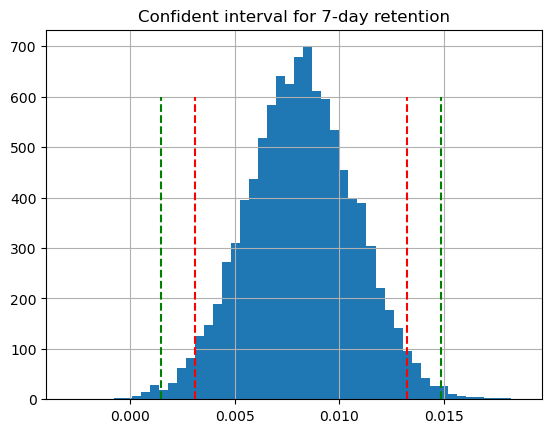

In [26]:
pd_boot_data_7dr.hist(bins=50)

plt.vlines([normal_ci(pd_boot_data_7dr, pd_boot_data_7dr.mean(),0.05)], ymax=600 ,ymin=0, linestyles='--', colors='red') #Построим 95% ДИ (красный цвет) /

plt.vlines([normal_ci(pd_boot_data_7dr, pd_boot_data_7dr.mean(),0.01)], ymax=600 ,ymin=0, linestyles='--', colors='green') #Построим 99% ДИ (зеленый цвет) / 

plt.title('Confident interval for 7-day retention')
plt.show()

In [27]:
print(*get_p_value_from_normal(pd_boot_data_7dr))

0.0015956665612162448


[EN] We see in the plot that 0 doesn't belong to the normal confident interval with confident level 95% (Also it doesn't belong to the normal ci with confident level 99%). This case means that there is a significant difference between the compared groups (1-day retention).
It's important to mark that the p-value which we get by the bootstrap method is practically equal to the p-value by Chi-square.
__________________________________________________________________________________________

[RU] Построив нормальный доверительный интервал (ДИ) по среднему значению с уровнем уверенности 95% и более высоким уровнем уверенности в 99%, видим, что ДИ не включает в себя 0 значение, следовательно, наблюдаются статистически значимые различия между сравниваемыми группами (Метрика ретеншн 7-го дня)
Важно отметить, что значения p-уровня значимости для данных метрики ретешн 7-го дня использовании хи-квадрата и метода bootstrap близки.

[EN] Let's explore the secondary metric - the sum of played gamerounds for 14 days after installing.
The values of this metric are numerical independent data. So, we should answer 2 quetions for better understanding which test we have to use:
1. Is a distribution of sample means normal?
2. Is there a homogeneity variance between the comparing groups?
__________________________________________________________________________________________

[RU] Изучим вторичную метрику, а именно сумму сыгранных раундов пользователем за 14 дней с момента входа.
Количество сыгранных раундов - это количественные независимые наблюдения. Для выбора критерия сравнения исследуемых групп необходимо ответить на 2 вопроса:
1. Наблюдения выборочных средних распределены нормально?
2. Наблюдается ли гомогенность дисперсий?


In [28]:
grouped_sum_gamerounds_table = table.groupby('version').agg({'sum_gamerounds':['mean', 'median']})
grouped_sum_gamerounds_table

sum_gamerounds       
                  mean median
version                      
gate_30      52.456264   17.0
gate_40      51.298776   16.0

In [29]:
table_gate30 = table.query('version == "gate_30"').copy()
table_gate40 = table.query('version == "gate_40"').copy()

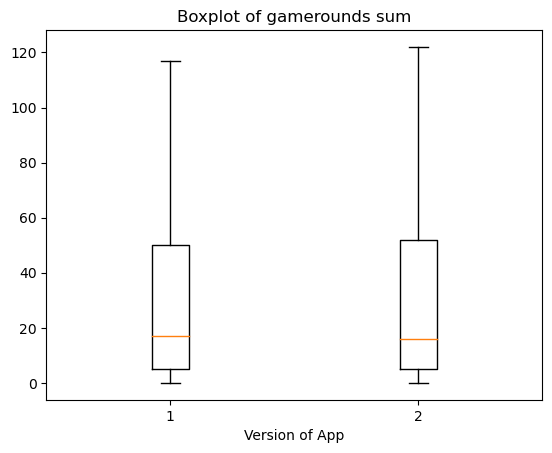

In [30]:
plt.boxplot([table_gate30.sum_gamerounds,table_gate40.sum_gamerounds], autorange=True, showfliers=False) 

#отсекаем быбросы, чтобы "ящик с усами" был более читабелен / cut the outliers for readable boxplot

plt.title('Boxplot of gamerounds sum')
plt.xlabel('Version of App')
plt.show()


[EN] Let's have a look at a boxplot without outliers, we see that the distribution of metric values is not normal. We see that distribution without outliers in 2 groups are praactically identical. But this conclusion doesn't answer the question about the distribution of sample means.
__________________________________________________________________________________________

[RU] Исходя из графика boxplot, в котором мы отсекли выбросы, можем сделать умозаключение, что распределение значений метрики сыгранных раундов отлично от нормального. Видим, что без выбросов распределения значений по двум группам практически идентичны. Но это умозаключение не отвечает на вопрос о распределении выборочных средних.

[EN] Then we check how the observation on sample means are distributed with help of bootstrap with the number of observations equal to the initial number of the observaations in each group.
__________________________________________________________________________________________
[RU] Далее мы проверим как распределены наблюдения выборочных средних с помощью bootstrap при количестве наблюдений равных исходному количеству наблюдений в каждой группе. 

In [31]:
result_a = []
result_b = []

for i in tqdm(range(10000)): #number of iterations

    sample_a = table[table['version']=='gate_30'][['sum_gamerounds']].sample(frac=1, replace=True).reset_index() # Sample control group
    sample_b = table[table['version']=='gate_40'][['sum_gamerounds']].sample(frac=1, replace=True).reset_index() # Sample test group
    

    result_a.append(sample_a['sum_gamerounds'].mean())
    result_b.append(sample_b['sum_gamerounds'].mean())

    
    

  0%|          | 3/10000 [00:00<07:29, 22.22it/s]

100%|██████████| 10000/10000 [03:48<00:00, 43.83it/s]


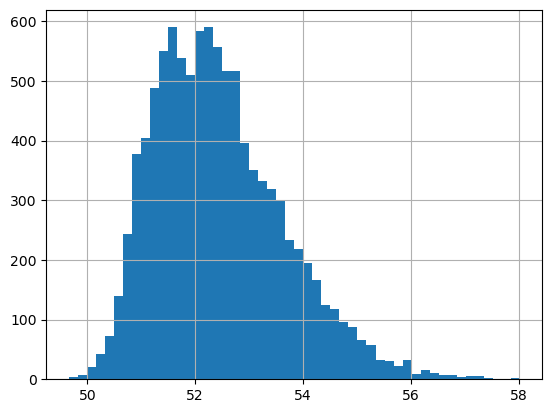

In [32]:
result_a = pd.Series(result_a)
result_a.hist(bins=50)
plt.show()

[EN] Let's have a look at a quantile-quantile plot (qqplot) of the sum of played gamerounds in the test and control groups.
__________________________________________________________________________________________

[RU] Посмотрим как распределяются фактические и теоретические значения метрики сумма сыгранных раундов в тестовой и контрольной группы на графике qqplot.

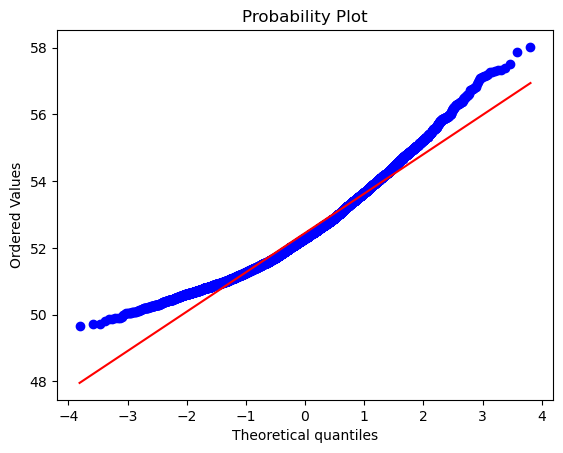

In [33]:

stats.probplot(result_a, dist='norm', plot=plt)
plt.show()

[EN] The distribution of values is not normal.

Let's use Shapiro-Wilka test for checking normality of distribution values.

H0: The values are taken from normal distribution. alpha/p-value > 0.05

H1: The values are not taken from normal distribution. alpha/p-value < 0.05

__________________________________________________________________________________________

[RU] Положение данных на графике qqplot также показало, что распределение значений в исследуемой метрике отлично от нормального. 

Для достоверности исследования проверим данные на нормальность с помощью теста Шапиро-Уилка. 

Н0: Значения взяты из нормального распределения. alpha/p-value > 0.05

Н1: Значения взяты из распределения отличного от нормального. alpha/p-value < 0.05

In [34]:
stats.shapiro(result_a)

c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9670603275299072, pvalue=9.710998357770982e-43)

[EN] As a result, we have the reason to decline H0. Принимаем H1.
__________________________________________________________________________________________
[RU] По результатам теста у нас есть основания отклонить Н0, о том, что выборки взяты из нормального распределения.

[EN] Let's repeat this steps for the test group.
__________________________________________________________________________________________

[RU] Повторим эти шаги для тестовой группы

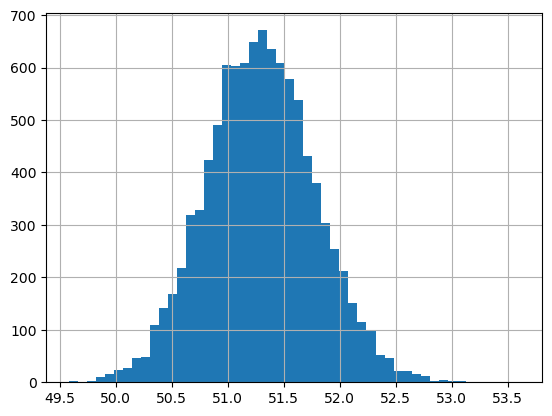

In [35]:
plt.rcParams.update(plt.rcParamsDefault)
result_b=pd.Series(result_b)
result_b.hist(bins=50)
plt.show()

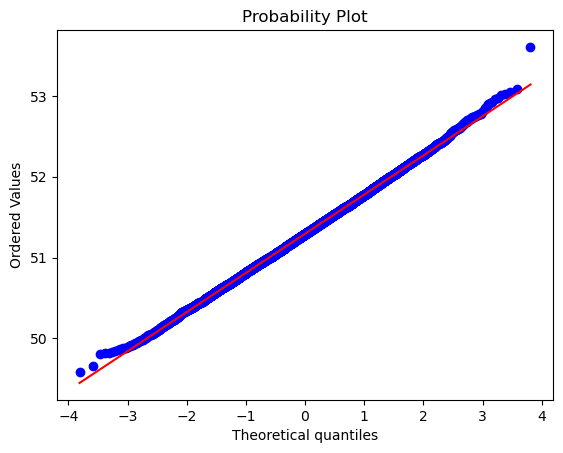

In [36]:
stats.probplot(result_b, dist='norm', plot=plt)
plt.show()

In [37]:
stats.shapiro(result_b)

c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9995619654655457, pvalue=0.018422456458210945)

[EN] As a result, we haven't the reason to decline H0.
__________________________________________________________________________________________
[RU] По результатам теста у нас нет основания отклонить Н0, о том, что выборка взята из нормального распределения. 


[EN] As aa result of the analysis we see that the distribution of the sample means for control group isn't normal while the distribution of the sample means for test group is normal. Considering the Central limit theorem, the initial number of observartions in control group is not enough for the normal sample means distribution. When increasing the number of observations for control group, the distribution of the sample means approximates to normal distribution. It seems that the initial number of observations is to several times more in order to the distribution of the sample means for control group comes to normal. But it increases the time of A/B test verification then. 
__________________________________________________________________________________________
[RU] Исходя из анализа распределения выборочных средних, мы видим, что распределение выборочных средних для контрольной группы отлично от нормального, в то время как, распределение выборочных средних для тестовой группы распределено нормально. Учитывая ЦПТ, изначального количества наблюдений в контрольной группе недостаточно, чтобы распределение выборочных средних пришло к нормальному. При увеличении количества наблюдений для контрольной группы распределение выборочных средних приблизится к нормальному распределению. Скорее всего, потребуется увеличение изначального количества наблюдений в контрольной выборке в несколько раз или несколько десятков раз, чтобы распределение выборочных средних контрольной группы свелось к нормальному, что в свою очередь увеличит время проверки результатов A/B теста.

[EN] According to the results of the analysis, we see that the values without outliers are obtained from one distribution. But under checking sample means we see that the sample means of test group are distributed normally, but in the control group they are not normal. Probably, it's due to outliers. 
Therefore, we will check:
1. If the values are taken from one distribution.
2. If there are abnomal values which could influence on group sample means.
__________________________________________________________________________________________
[RU] По результатам анализа мы видим, что данные без выбросов взяты из одного распределения, но при проверке выборочных средних мы видим, что выборочные средние тестовой группы распределены нормально, а в контрольной распределены ненормально. Скорее всего на это влияют выбросы. Исходя из этого далее проверим:
1. Из одного ли распределения взяты данные
2. Посмотрим имеются ли аномальные значения, которые могут так сильно влиять на выборочные средние групп.

[EN] We take the already prepared script to check which distributions our distribution belongs.
__________________________________________________________________________________________
[RU] Для проверки распределений, из которых взяты наблюдения исследуемых групп, возьмем готовый скрипт.

In [38]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = table_gate30.sum_gamerounds

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

In [39]:
best_dis_for_control =pd.DataFrame(best_distibutions,columns=['dist', 'val', 'rat']).sort_values('rat')



In [40]:
best_dis_for_control.head(20)

,dist,val,rat
0,<scipy.stats._continuous_distns.foldnorm_gen o...,"(0.20789773036076364, -1.777202582020098e-07, ...",9.539937e-09
1,<scipy.stats._continuous_distns.skew_norm_gen ...,"(9697152.447798278, -5.8412797883504935e-05, 1...",1.003611e-08
2,<scipy.stats._continuous_distns.rice_gen objec...,"(0.0017531016621202774, -78.49172300780538, 11...",3.299896e-07
3,<scipy.stats._continuous_distns.rdist_gen obje...,"(5865.342712253445, 52.43090445595158, 7945.06...",6.920712e-07
4,<scipy.stats._continuous_distns.vonmises_gen o...,"(86.89644320283594, 49.75629421007986, 934.010...",7.119350e-07
5,<scipy.stats._continuous_distns.kstwobign_gen ...,"(-166.72646287073638, 263.5028728141886)",8.996620e-07
6,<scipy.stats._continuous_distns.moyal_gen obje...,"(20.45672056901742, 33.48872674957021)",1.922987e-06
7,<scipy.stats._continuous_distns.truncnorm_gen ...,"(0.008071171386168564, 190.46385927911257, -2....",2.200763e-06
8,<scipy.stats._continuous_distns.halfnorm_gen o...,"(-5.851127199388407e-10, 262.01830559264874)",2.231794e-06
9,<scipy.stats._continuous_distns.hypsecant_gen ...,"(32.2057900798592, 70.23770999133214)",2.488658e-06


In [41]:
plt.rcParams.update(plt.rcParamsDefault)

In [42]:
best_dis_for_control['dist'][0]

In [43]:
best_dis_for_control['val'][0]

(0.20789773036076364, -1.777202582020098e-07, 113.30150521311299)

In [44]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = table_gate40.sum_gamerounds

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

  1 / 105: ksone


  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 105: norminvgauss


c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2052: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4534: RuntimeWarning: overflow encountered in double_scalars
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4534: RuntimeWarning: invalid value encountered in double_scalars
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2052: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
c:\Users\Slava\miniconda3\lib\site-packages\numpy\lib\function_base.py:24

Text(0, 0.5, 'Frequency')

In [45]:
best_dis_for_test =pd.DataFrame(best_distibutions,columns=['dist', 'val', 'rat']).sort_values('rat')

In [46]:
best_dis_for_test.head(20)

,dist,val,rat
0,<scipy.stats._continuous_distns.norminvgauss_g...,"(48.60276451228023, 48.60237827801538, -1.6844...",0.000001
1,<scipy.stats._continuous_distns.invgauss_gen o...,"(5.19405145915654, -1.6827188002247273, 10.200...",0.000001
2,<scipy.stats._continuous_distns.genextreme_gen...,"(-1.2244919409545623, 8.127100087996318, 12.14...",0.000003
3,<scipy.stats._continuous_distns.betaprime_gen ...,"(4.308265621013332, 0.8407192922971043, -1.536...",0.000006
4,<scipy.stats._continuous_distns.invgamma_gen o...,"(0.8362876321193049, -2.4409106742660063, 8.64...",0.000006
5,<scipy.stats._continuous_distns.burr_gen objec...,"(1.1790317817628155, 0.6486804023343494, -5.10...",0.000006
6,<scipy.stats._continuous_distns.pareto_gen obj...,"(1.1706256082598, -19.632085385378527, 19.6320...",0.000011
7,<scipy.stats._continuous_distns.nct_gen object...,"(0.780603219841409, 22.298870993389713, -4.354...",0.000012
8,<scipy.stats._continuous_distns.johnsonsu_gen ...,"(-4.454733249944159, 0.5831920890921932, -0.26...",0.000018
9,<scipy.stats._continuous_distns.lognorm_gen ob...,"(1.7157500071954126, -0.26168682590540004, 15....",0.000018


In [47]:
plt.rcParams.update(plt.rcParamsDefault)

In [48]:
best_dis_for_test['dist'][1]

In [49]:
dist_parametres_for_test = best_dis_for_test['val'][1] #сохраним значения распределения в переменную
dist_parametres_for_test

(5.19405145915654, -1.6827188002247273, 10.200451954638698)

In [50]:
(a_test,b_test,c_test ) = dist_parametres_for_test

[En] According to the results of our analysis, we see that observations of control and test group are obtained from different distributions. (Among the neighboring distributions there is not any distribution which describes the control and test group's distributions)
When using A/B-test, the most important condition is that the values of control and test group should be taken from the one and the same distribution
__________________________________________________________________________________________
[RU] По результатам анализа исходного распределеня видим, что наблюдения двух групп взяты из разных распределений (Среди ближайших  распределений нет одного, которое бы описывало распределение наблюдений двух групп).
При проведении A/B-тестирование важным условием является, чтобы наблюдения тестовой и контрольной групп должны быть взяты из одного распределения.

[En] Now let's see if there abnormal values in the groups 
__________________________________________________________________________________________
[RU] Теперь посмотрим имеются аномальные значения в группах.

In [51]:
table_gate30.sort_values('sum_gamerounds', ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
...,...,...,...,...,...
40973,4533461,gate_30,0,False,False
20880,2323023,gate_30,0,False,False
81104,8981313,gate_30,0,False,False
87537,9696981,gate_30,0,False,False


In [52]:
table_gate40.sort_values('sum_gamerounds', ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7
29417,3271615,gate_40,2640,True,False
48188,5346171,gate_40,2294,True,True
36933,4090246,gate_40,2124,True,True
88328,9791599,gate_40,2063,True,True
6536,725080,gate_40,2015,True,True
...,...,...,...,...,...
68657,7608893,gate_40,0,False,False
1988,214700,gate_40,0,False,False
80941,8964492,gate_40,0,False,False
29402,3270520,gate_40,0,False,False


In [53]:
table_gate30.sum_gamerounds.mean()

52.45626398210291

In [54]:
table_gate40.sum_gamerounds.mean()

51.29877552814966

[En] We see that there is one abnormal value which 17 time exceed the outliers. Probably, it is specially added to the dataset or it is the result of a game from the part of Q&A ingeneer. Or it is just accident. Probably, this anomaly greatly influences on mean of the metric.
We delete this anomaly for correctness of the results.
__________________________________________________________________________________________
[RU] Видим, что наблюдается аномальное значение в контрольной группе, которое превышает выбросы в несколько десятков раз. Возможно, оно добавлено в датасет специально или за этим значением стоит результаты игры тестировщика приложения. Возможно, это просто уникальная слуайность - аномальное событие. Данная аномалия, скорее всего, имеет сильное влияние на среднее значение, распределение метрики суммы сыгранных раундов.
Для корректности результатов мы удалим эту аномалию из датасета.

In [55]:
table_gate30_changed = table_gate30.copy()

In [56]:
table_gate30_changed.sort_values('sum_gamerounds', ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
...,...,...,...,...,...
40973,4533461,gate_30,0,False,False
20880,2323023,gate_30,0,False,False
81104,8981313,gate_30,0,False,False
87537,9696981,gate_30,0,False,False


In [57]:
table_gate30_changed = table_gate30_changed[(table_gate30_changed.userid != 6390605)&(table_gate30_changed.sum_gamerounds != 49854)]
table_gate30_changed.sort_values('sum_gamerounds', ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7
7912,871500,gate_30,2961,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
655,69927,gate_30,1906,True,True
...,...,...,...,...,...
35194,3897718,gate_30,0,False,False
35197,3898155,gate_30,0,False,False
54101,6006695,gate_30,0,False,False
54068,6002817,gate_30,0,False,False


In [58]:
len(table_gate30) - len(table_gate30_changed) # Проверяем, не удалили ли мы случайно другие значени из датасета

1

In [59]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = table_gate30_changed.sum_gamerounds

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

  1 / 105: ksone


  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 105: norminvgauss


Text(0, 0.5, 'Frequency')

In [60]:
best_dis_for_changed_control =pd.DataFrame(best_distibutions,columns=['dist', 'val', 'rat']).sort_values('rat')


In [61]:
best_dis_for_changed_control

,dist,val,rat
0,<scipy.stats._continuous_distns.invgauss_gen o...,"(4.967303375589872, -1.7499425202877554, 10.68...",2.307768e-06
1,<scipy.stats._continuous_distns.norminvgauss_g...,"(72.43809993704772, 72.43782453302833, -1.7345...",2.390726e-06
2,<scipy.stats._continuous_distns.pareto_gen obj...,"(1.2160960285620188, -21.294153750359836, 21.2...",4.737040e-06
3,<scipy.stats._continuous_distns.invweibull_gen...,"(0.8341232665113325, -1.9517895317980911, 10.3...",5.503791e-06
4,<scipy.stats._continuous_distns.genextreme_gen...,"(-1.198863067363138, 8.443804233956882, 12.462...",5.503795e-06
...,...,...,...
99,<scipy.stats._continuous_distns.trapezoid_gen ...,"(0.9999999999999999, 1.0, -310.905, 3553.19999...",1.193232e-03
100,<scipy.stats._continuous_distns.trapezoid_gen ...,"(0.9999999999999999, 1.0, -310.905, 3553.19999...",1.193232e-03
101,<scipy.stats._continuous_distns.weibull_max_ge...,"(0.10829612427852553, 2961.000000000001, 1.723...",1.214052e-03
102,<scipy.stats._continuous_distns.vonmises_gen o...,"(1.8391935193888553, 7.386233765639828, 1.0437...",1.036941e+59


In [62]:
plt.rcParams.update(plt.rcParamsDefault)

In [63]:
best_dis_for_changed_control['dist'][0]

In [64]:
dist_parametres_for_control = best_dis_for_changed_control['val'][0] #сохраним значения распределения в переменную
dist_parametres_for_control

(4.967303375589872, -1.7499425202877554, 10.688374410070185)

[En] After removing the anomaly, we see that there are 2 distributions which describes the test and control group's distribution.
__________________________________________________________________________________________
[RU] После удаления аномального значения видим, что имеется два распределения близких по оценке соответствия, описывыющих распределения наблюдений в тестовой и контрольной группах.

[En] Then let's check the sample means distribution in control group without anomaly.
__________________________________________________________________________________________
[RU] Далее проверим распрелеление выборочных средних в контрольной группе без аномального значения.

In [65]:
result_a_for_changed = []


for i in tqdm(range(5000)): #number of iterations
    sample_a = table_gate30_changed['sum_gamerounds'].sample(frac=1, replace=True).reset_index() # Sample control group
    
    result_a_for_changed.append(sample_a['sum_gamerounds'].mean())

100%|██████████| 5000/5000 [00:13<00:00, 359.89it/s]


In [66]:
plt.rcParams.update(plt.rcParamsDefault)

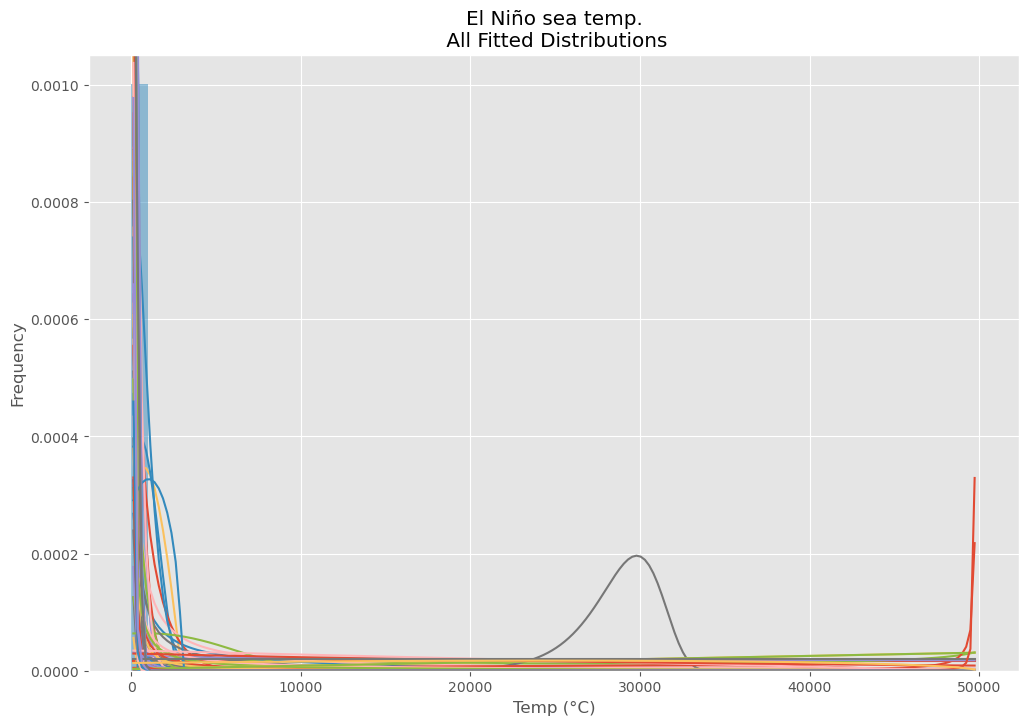

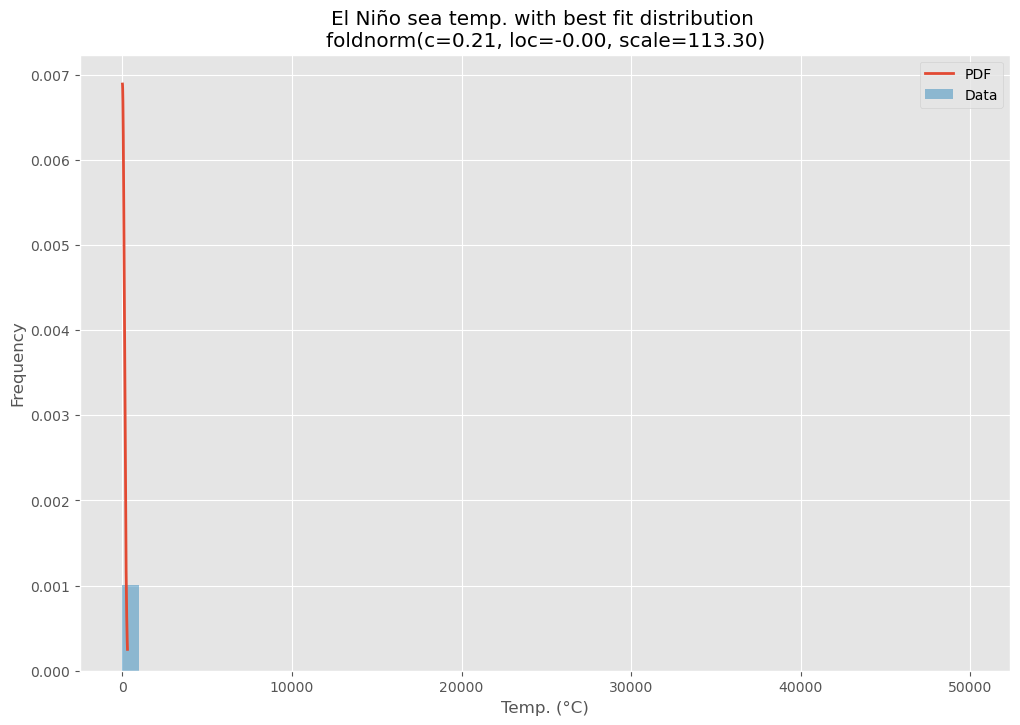

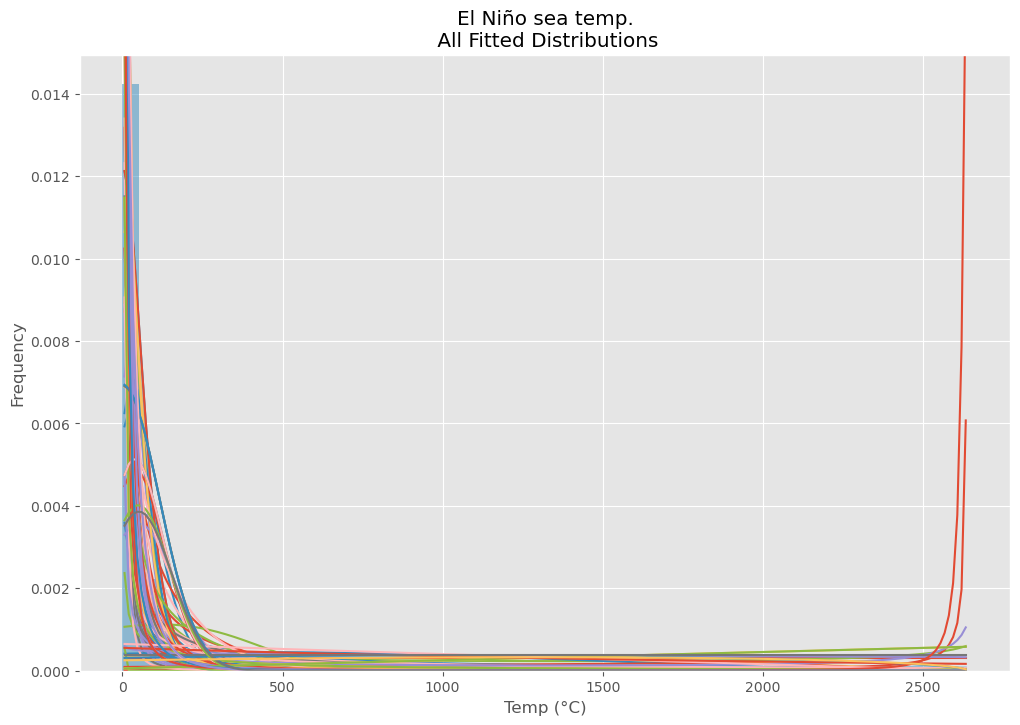

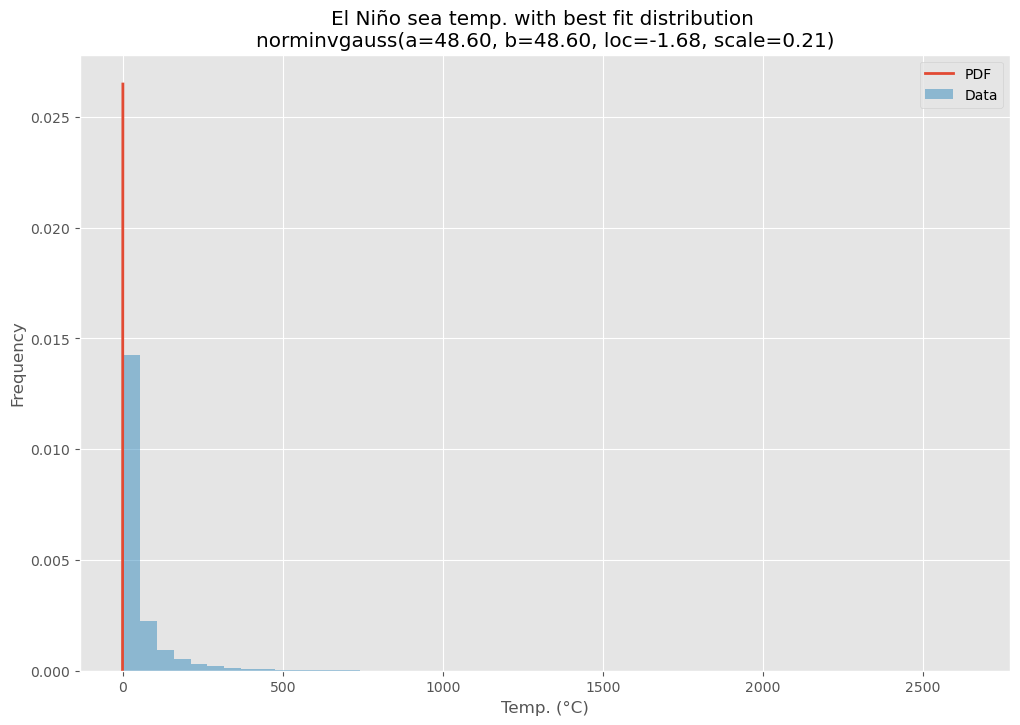

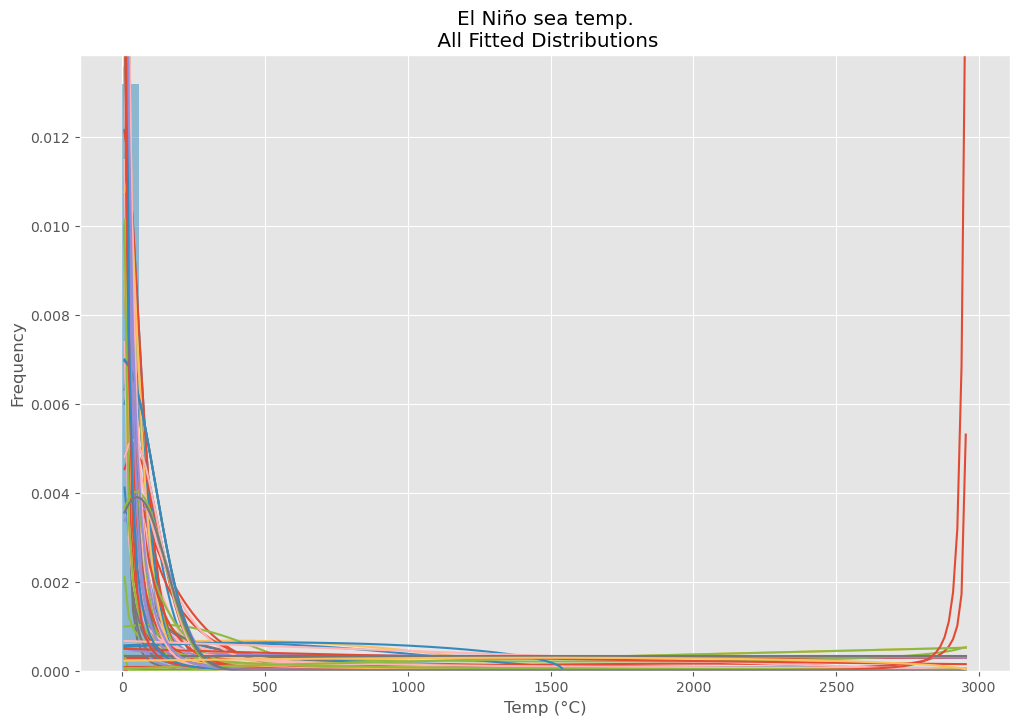

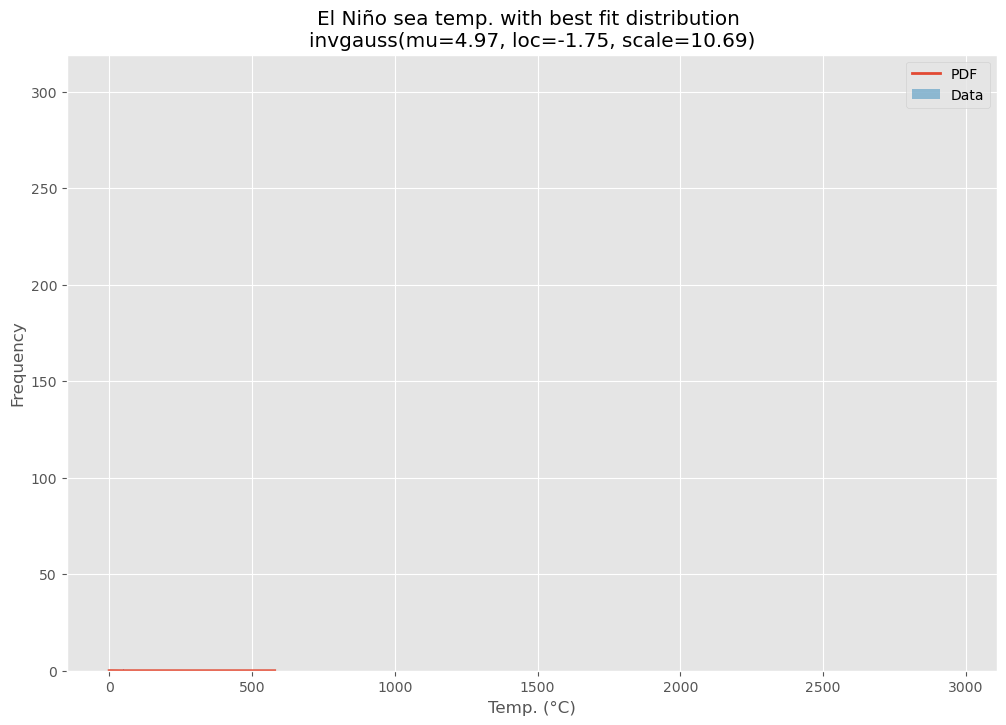

In [67]:

result_a_for_changed=pd.Series(result_a_for_changed)
result_a_for_changed.hist(bins=50)
plt.show()

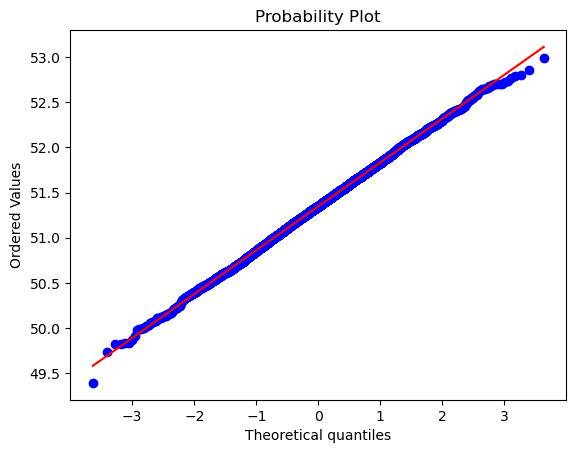

In [68]:
stats.probplot(result_a_for_changed, dist='norm', plot=plt)
plt.show()

In [69]:
stats.shapiro(result_a_for_changed)

ShapiroResult(statistic=0.9996349811553955, pvalue=0.5116173028945923)

[En] The sample meaans distribution of control group without anomaly is normal.
__________________________________________________________________________________________
[RU] Распрделение выборочных средних в контрольной группе без аномального значения нормально или максимально близко нормальному.

[EN] Our next step will be research the sum played gamerounds for 14 days after installing variance homogeneity.

We are going to use Levene test for this research
__________________________________________________________________________________________

[RU] Далее нам необходимо исследовать значения метрики сумма сыгранных раундов в тестовой и контрольной группы на гомогенность дисперсий.

Для этого используем тест Левене.

[EN] Levene test hypothesis:

H0: Variance homogeneity is equal between the 2 comparing groups (test and control) 

H1: Variance homogeneity is not equal between the 2 comparing groups (test and control) 
__________________________________________________________________________________________

[RU] Гипотеза для проведения теста Левене:

Н0: Значения из тестовой и контрольной группы взяты из генеральных совокупностей, в которых дисперсия распределения данных гомогенна. p-value>0.05

Н1: Значения из тестовой и контрольной группы взяты из генеральных совокупностей, в которых дисперсия распределения данных НЕ гомогенна. p-value<0.05

In [70]:
levene_stat, levene_pvalue = stats.levene(table_gate30_changed.sum_gamerounds, table_gate40.sum_gamerounds)
print('levene statistic:', levene_stat,'\n''levene p-value:', levene_pvalue)

levene statistic: 0.07510153837481241 
levene p-value: 0.7840494387892463


[EN] We get the result of Levene test that there is no significant difference in variance homogeneity between the comparing groups. So, we haven't the reason to decline H0.

__________________________________________________________________________________________

[RU] По результатам теста Левене нет статистический значимой разницы между десперсиями тестовой и контрольной группы, поэтому у нас нет оснований отклонить Н0, что дисперсии групп гомогенны.




__________________________________________________________________________________________

[RU] Все условия для применения t-теста соблюдены. Мы проверим исследуемые группы на наличие статистической значимости с помощью критерия Стьюдента и критерия Манна-Уитни с последующей проверкой критериев на ошибку первого и второго рода на распределении (Мощность).

[En] Let's import the necessary distribution.
_______________________________________________________________________________________________
[RU] Далее импортируем необходимое распределение.

In [71]:
from scipy.stats import invgauss

In [72]:
(a_control,b_control,c_control) = dist_parametres_for_control
mean, var, skew, kurt = invgauss.stats(a_control,b_control,c_control, moments='mvsk')

In [73]:
mean

array(51.34245577)

In [74]:
table_gate30_changed.sum_gamerounds.mean()

51.342110561757536

In [75]:
mean, var, skew, kurt = invgauss.stats(a_test,b_test,c_test, moments='mvsk')

In [76]:
mean

array(51.29895356)

In [77]:
table_gate40.sum_gamerounds.mean()

51.29877552814966

[EN] Student's T-Test:

H0: There is no significant difference between group's means in the comparing groups. p-value > 0.05

H1: There is a significant difference between group's means in the comparing groups. p-value <0.05
__________________________________________________________________________________________

[RU]  Т-критерий Стьюдента:

Н0: Нет статистически значимых различий между средними значениями в исследуемых группах. alpha > 0.05

Н1: Статистически значимые различия между средними значениями в исследуемых группах наблюдаются. aplha < 0.05

In [78]:
ttest_stat, pval_ttest=stats.ttest_ind(table_gate30_changed.sum_gamerounds, table_gate40.sum_gamerounds)
pval_ttest
print('t-statistic:', ttest_stat,'\n''t p-value:', pval_ttest)

t-statistic: 0.0633675766982082 
t p-value: 0.9494739458256001


[EN] As a result, we haven't the reason to decline H0, because there is no significant difference between group's means the comparing groups
__________________________________________________________________________________________

[RU] У нас нет оснований отклонить Н0 о том, что не имеется статистически значимых различий между средними значениями в исследуемыми группами.

[EN] We should calculate the power of the using t-test on our distribution.
__________________________________________________________________________________________

[RU] Далее, нам необходимо определить мощность исспользуемого t-критерия.

In [79]:
effect_size = (table_gate30_changed.sum_gamerounds.mean()-table_gate40.sum_gamerounds.mean())/table_gate30_changed.sum_gamerounds.std()
effect_size
# Calculate the effect size on the results of A/b test  / Вычеслим effect size дл результатов A/B-теста

0.00042461349770031825

In [80]:
sms.TTestIndPower().solve_power(effect_size=effect_size,alpha=0.05,
nobs1=len(table_gate30_changed.sum_gamerounds),
ratio=len(table_gate40.sum_gamerounds)/len(table_gate30_changed.sum_gamerounds), 
power=None) # Calculating the power of t-test on the researching distribution / Рассчитываем мощность t-критерия Стьюдента

0.05046575053263044

In [81]:
ttest_result = [] 
n = 10000
for i in tqdm(range(n)):
    a = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    b = invgauss.rvs(a_test,b_test,c_test, size=len(table_gate40.sum_gamerounds ))
    _, pval_ttest= stats.ttest_ind(a,b)
    ttest_result.append(pval_ttest) 

100%|██████████| 10000/10000 [01:29<00:00, 111.25it/s]


In [82]:
(np.array(ttest_result) <0.05).mean()
 # Calculating the power of t-test on the researching distribution by bootstrap / Рассчитываем мощность t-критерия Стьюдента с помощью bootstrap

0.0503

In [83]:
ttest_result = [] 
n = 10000
for i in tqdm(range(n)):
    a = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    b = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    _, pval_ttest= stats.ttest_ind(a,b)
    ttest_result.append(pval_ttest)

100%|██████████| 10000/10000 [01:26<00:00, 115.95it/s]


In [84]:
(np.array(ttest_result) <0.05).mean() 
# Calculating the alpha (False-positive) of t-test on the researching distribution by bootstrap / Рассчитываем ошибку первого рода t-критерия Стьюдента с помощью bootstrap

0.0486

In [85]:
sms.TTestIndPower().solve_power(effect_size=effect_size,alpha=None,
                                nobs1=len(table_gate30_changed.sum_gamerounds),
                                ratio=len(table_gate40.sum_gamerounds)/len(table_gate30_changed.sum_gamerounds), 
                                power=0.050465750522203985)
# Calculating the alpha (False-positive) of t-test on the researching distribution / Рассчитываем ошибку первого рода t-критерия Стьюдента

0.05000162741666864

In [86]:
sms.TTestIndPower().solve_power(effect_size=effect_size,
                                alpha=0.05,
                                nobs1=None,
                                ratio=len(table_gate40.sum_gamerounds)/len(table_gate30_changed.sum_gamerounds), 
                                power=0.8) # / Считаем размер выборки, при котором омщность теста будет 80%

86310056.19410843

[EN] The propability to make false-positive mistake of the researched distribution with the initial sample size is less than 5%. We see, that the power of the test is just 5% at the researched distribution. The sample size = 86 000 000 observation is necessary for the 80% power of t-test.
__________________________________________________________________________________________

[RU] Вероятность совершить ошибку первого рода на исследуемом распрделении с исходным размером выборки ниже 5%. Видим, что на исследуемом распределении с исходным размером выборки мощность теста составляет всего 5%. Для мощности t-теста в 80% на исследуемом распрделении необходима выборка в размере 86,000,000 наблюдений

[EN] Let's compare the result of t-test with the result of Mann-Whitney test on recearching distribution. And let's calculate the power of Mann-Whitney.
__________________________________________________________________________________________

[RU] Далее, сравним результаты t-теста с результатами критерия Манна-Уитни в исследуемом распределении и также вычеслим его мощность.

[EN] Mann-Whitney test:

H0: There is no significant difference between ranks in the comparing groups. p-value > 0.05

H1: There is a significant difference between ranks in the comparing groups. p-value <0.05
__________________________________________________________________________________________

[RU] Тест Манна-Уитни:

Н0: Нет статистически значимых различий между рангами в исследуемых группах. alpha > 0.05

Н1: Статистически значимые различия между рангами в исследуемых группах наблюдаются. aplha < 0.05

In [87]:
mn_stat, mn_pvalue = stats.mannwhitneyu(table_gate30_changed.sum_gamerounds, table_gate40.sum_gamerounds, alternative='two-sided') 
print('mann-whitney statistic:', mn_stat,'\n''mann-whitney p-value:', mn_pvalue)

mann-whitney statistic: 1024285761.5 
mann-whitney p-value: 0.05089155279145376


[EN] As a result, we haven't the reason to decline H0, because there is no significant difference between means in the comparing groups
__________________________________________________________________________________________

[RU] У нас нет оснований отклонить Н0 о том, что не имеется статистически значимых различий между средними значениями в исследуемыми группами.

In [88]:
mann_result = [] 
n = 10000
for i in tqdm(range(n)):
    a = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    b = invgauss.rvs(a_test,b_test,c_test, size=len(table_gate40.sum_gamerounds ))
    _, pval_mann= stats.mannwhitneyu(a,b)
    mann_result.append(pval_mann)

100%|██████████| 10000/10000 [14:42<00:00, 11.33it/s]


In [89]:
(np.array(mann_result) <0.05).mean() #power of the test

0.7553

In [90]:
mann_result = [] 
n = 10000
for i in tqdm(range(n)):
    a = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    b = invgauss.rvs(a_control,b_control,c_control, size=len(table_gate30_changed.sum_gamerounds))
    _, pval_mann= stats.mannwhitneyu(a,b)
    mann_result.append(pval_mann)

100%|██████████| 10000/10000 [15:17<00:00, 10.90it/s]


In [91]:
(np.array(mann_result) <0.05).mean() #alpha of the test

0.052

[EN] The propability to make false-positive mistake of the researched distribution with the initial sample size is less than 5%. We see, that the power of the Mann-Whitney test is somewhat less than 80% at the researched distribution. 
__________________________________________________________________________________________

[RU] Вероятность совершить ошибку первого рода на исследуемом распрделении с исходным размером выборки ниже 5%. Видим, что на исследуемом распределении с исходным размером выборки мощность теста составляет чуть ниже 80%.

[EN] From comparising of 2 tests for the researched distribution we see that Mann-Whitney test is more powerful which shows alomost the significance difference between groups. Probably, such results can be explained by the fact that Mann-Whitney test compares the ranks between 2 groups. Theofore, it's quite difficult to interpret the result of the test from practical point of view.
__________________________________________________________________________________________

[RU] Из сравнения двух критериев видим, что на иследуемом распределении с исходным размером выборки критерий Манна-Уитни оказался мощней, почти показав статистически значемые различия между группами. Такие результаты, скорее всего, объясняются тем, что критерий Манна-Уитни сравнивает ранги сравниваемых групп по сравнению с Т-критерием Стьюдента, поэтому его результаты тяжелее интерпритировать в практической плоскости вопроса.

[EN] Though the both tests show the absense of significant difference between groups, they show different power. Let's check the results of A/B-test with this metric with the help of bootstrap.
__________________________________________________________________________________________

[RU] Хоть оба теста показали отсутствие статистически значимых различий между группами, но они показали разную мощность. Проверим результаты A/B-теста по данной метрике с помощью метода bootstrap.

In [92]:
result_for_changed = []


population_size = max([len(table_gate30_changed.sum_gamerounds), len(table_gate40.sum_gamerounds)]) 

for i in tqdm(range(10000)): #number of iterations

    sample_a = table_gate30_changed.sum_gamerounds.sample(population_size, replace=True) # Sample control group
    sample_b = table_gate40.sum_gamerounds.sample(population_size, replace=True) # Sample test group
    difference = sample_a.mean()-sample_b.mean()
    result_for_changed.append(difference)


100%|██████████| 10000/10000 [00:26<00:00, 374.60it/s]


In [93]:
pd_result_for_changed = pd.Series(result_for_changed)

In [94]:
plt.rcParams.update(plt.rcParamsDefault)

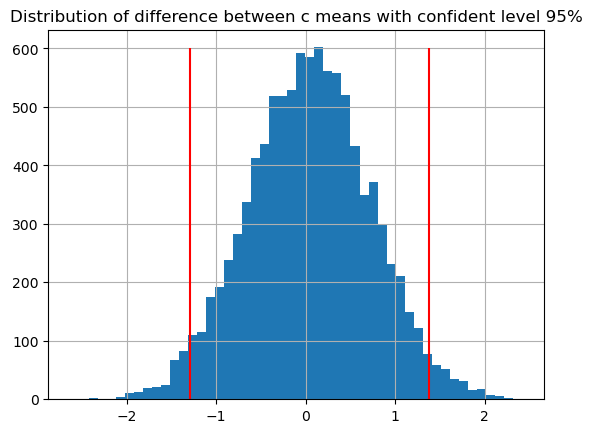

In [95]:
pd_result_for_changed.hist(bins=50) #построим график распределения значений
plt.title('Distribution of difference between с means with confident level 95%') 
plt.vlines([normal_ci(pd_result_for_changed, pd_result_for_changed.mean(),0.05)],
            ymax=600 ,ymin=0, linestyles='-', colors='red') #Построим 95% ДИ (красный цвет) / Red light for 95% CI
plt.show()

In [96]:
stats.shapiro(pd_result_for_changed)

c:\Users\Slava\miniconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.999779462814331, pvalue=0.40114477276802063)

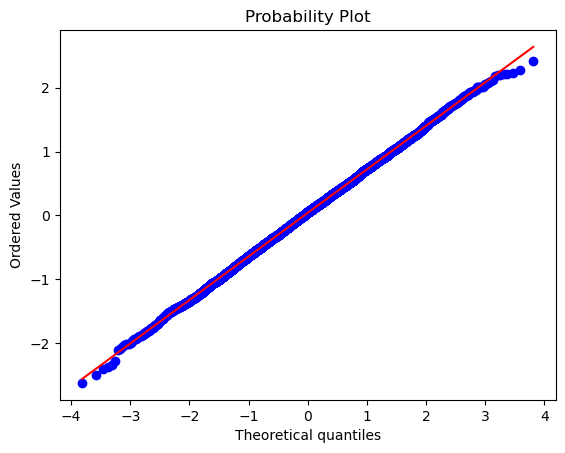

In [97]:
stats.probplot(pd_result_for_changed, plot=plt)
plt.show()

In [98]:
get_p_value_from_normal(pd_result_for_changed) # Посчитаем веротность получить такие или более ярко выраженные значения

0.9529821439517135

[EN] We see in the plot that 0 belongs to the normal confident interval with confident level 95%. This case means that there is no significant difference between the compared groups (the sum of played rounds for 14 days). 
__________________________________________________________________________________________

[RU] Построив нормальный доверительный интервал (ДИ) по среднему значению с уровнем уверенности 95%, видим, что ДИ включает в себя 0 значение, следовательно, статистически значимых различий между средними значениями сравниваемых групп не наблюдается (Метрика сумма сыгранных раундов за 14 дней). Важно отметить, что веротность получить такие или более ярко выраженные значения при использовании метода bootstrap близко к результатам t-теста (с низкой мощностью на исходной выборке) 

[EN] As a result of the analysis of the secondary metric - 'sum of played gamerounds for 14 days' - with the help of t-test, Mann-Whitney test, method bootstrap for the significant difference of the means/ranks in the test and control groups, we conclude that we don't need to use Mann-Whitney test and its results at this distribution for investigation of means because the Mann-Whitney results can give us the wrong interpretation of significant difference existance between the control and test groups. 
__________________________________________________________________________________________

[RU] Исходя из анализа с помощью критерия Манна-Уитни, критерия Стьюдента и метода Bootstrap второстепенной метрики сумма сыгранных раундов за 14 дней на наличие статистически значимых различий между средними значеними/рангами в тестовой и контрольной группах приходим к выводу, что на данном распределении не стоит использовать критерий Манна-Уитни и его результаты для исследования различий между средними значениями, т.к. его результаты могут привести к ошибочной интерпритации наличия статистически значимой разницы между контрольной и тестовой группами.

[EN] Notice: This dataset is likely generated or cleaned earlier for presentation in open sources. There are no another important metrics for mobile app which could be changed by introduction of the new feature like ARPU, ARPPU, LTV etc.

Summary:

Results of comparing test and control groups on metrics are as follows:

1. 1-day Retention

a) There is no significant difference between the compared groups in Chi-squared results

b) There is no significant difference between the compared groups  with the help of the  bootstrap method

2. 7-day Retention

a) There is a significant difference between the compared groups in Chi-squared results

b) There is a significant difference between the compared groups with the help of the bootstrap method

3. The sum of played gamerounds for 14 days after installing

a) There is no significant difference between the compared groups with the help of the bootstrap method

We make a conclusion on the results of A/B-testing that scaling the new feature to all app/users will not give positive changes to the key metric 1-day retention and to the secondary metric the sum played gamerounds for 14 days after installing and but it will give negative changes to the key metric 7-day retention. So, the developers have to deny this feature at all or have to modify the hypothesis and this feature too. 

[RU] Замечание: Скорее всего данный датасет либо сгенерирован, либо уже обработан и определенные значения очищены, скорректированы для тестового показа. Нет данных по изменениям других важных метрик мобильного приложения, на которые могло повлиять внедрение новой фичи: ARPU, ARPPU, LTV и др.

Вывод:

Результаты сравнения тестовой и контрольной группы по метрикам:

1. Метрика ретеншн 1-го дня 

a) Нет статистически значимых различий между данными сравниваемых групп (тестовой и контрольной) по результатам анализа с использованием критерия хи-квадрат

b) Нет статистически значимых различий между данными сравниваемых групп (тестовой и контрольной) по результатам анализа с использованием метода bootstrap 
(нет предпосылок раскатывать изменения на весь продукт)

2. Метрика ретеншн 7-го дня

a) Наблюдаются статистически значимые различия между данными сравниваемых групп (тестовой и контрольной) по результатам анализа с использованием критерия хи-квадрат.

b) Наблюдаются статистически значимые различия между данными сравниваемых групп (тестовой и контрольной) по результатам анализа с использованием метода bootstrap. 

3. Метрика сумма сыгранных раундов за 14 дней после установки - 

a) Нет статистически значимых различий между средними сравниваемых групп

Исходя из анализа результатов A/B-теста приходим к выводу, что масштабирование новой фичи на весь продукт не приведет к положительнм или отрицательным измененим ключевой метрики ретеншн 1го дн и второстепенной метрики сумма сграннх раундов, но будет вести к отрицательнм измененим ключевой метрики ретеншн го дн. Следовательно, стоит отказаться от внедрения новой фичи и самой гипотезы или отложить гипотезу для последующей корректировки.

